# Linear Regression for Human Beings

Let's try to explain some linear regression concepts without formulas or official definitions or anything things like that! Here we go.

## Coffee Cups

**We sell coffee, and it costs \$2.** Since we're 💼💰Important Business People💰💼, we might have some big questions about finance, such as:

* If we sell **zero coffees**, how much money do we make?
* If we sell **four coffees**, how much money do we make?
* If we sell **sixteen coffees**, how much money do we make?

Since coffee costs $2, we can just multiply it out.

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × $2 per coffee`|We make \\$0|
|We sell four coffees|`4 × $2 per coffee`|We make \\$8|
|We sell sixteen coffees|`16 × $2 per coffee`|We make \\$32|

So in those situations, since coffee costs \\$2, we would make \\$0, \\$8, and \\$32. Easy-peasy!

Linear regression, if we're going to skip over the specifics, is the **opposite of what we just did.** Let's take the same example, but twist it around a little bit.

Let's say we know this:

* We sold **zero coffees**, and made \$0
* We sold **four coffees**, and made \$8
* We sold **sixteen coffees**, and made \$32

Linear regression is: **How much does coffee cost?**

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × ??? per coffee`|We make \\$0|
|We sell four coffees|`4 × ??? per coffee`|We make \\$8|
|We sell sixteen coffees|`16 × ??? per coffee`|We make \\$32|

We can probably even figure it out in our heads: **coffee costs $2!** Easy, right? That's it. We're done!! That's linear regression!!

Well... kind of, sort of, more or less, anyway. **Let's see how that looks in code.**

<p class="reading-options">
  <a class="btn" href="/basic-ml-concepts/linear-regression">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/basic-ml-concepts/notebooks/Linear Regression.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="#">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

# How to perform a linear regression using Python

We'll start off  with our data. We're going to use [pandas](https://pandas.pydata.org/), a super-popular Python library for doing data-y things.

In [108]:
import pandas as pd

df = pd.DataFrame([
    { 'sold': 0, 'revenue': 0 },
    { 'sold': 4, 'revenue': 8 },
    { 'sold': 16, 'revenue': 32 },
])
df

,sold,revenue
0,0,0
1,4,8
2,16,32


Our very tiny dataset has two columns:

* Number of coffees sold
* Amount of revenue from selling those coffees

Now we want to ask: hey, if we sold this many coffees and made this much money, **how much does a coffee cost?** This is linear regression! To perform our linear regression, we're going to use a library called [statsmodels](statsmodels.org), which conveniently (?) has two different ways of writing the code.

### Formula style

One way to calculate how much the coffee costs is [writing a formula](https://www.statsmodels.org/stable/example_formulas.html). I didn't learn this method until later, but it's so much more fun than the normal version! That's why I'm giving it to you first.

In [109]:
import statsmodels.formula.api as smf

# What effect does the number of coffees sold have on our revenue?
model = smf.ols(formula='revenue ~ sold', data=df)
results = model.fit()

### Pandas style

I don't have a better name for this one, so we're calling it pandas style! It's a little more complicated looking, but you'll see people use it all the time. I think it's the default way that people learn with statsmodels.

In [110]:
import statsmodels.api as sm

# What effect does the number of coffees sold have on our revenue?
X = df[['sold']]
X = sm.add_constant(X)
y = df.revenue

model = sm.OLS(y, X)
results = model.fit()

## Examining our results

No matter which method you use to calculate how much coffee costs, you end up with a variable called `results`. **We'll use this variable to see the answer.**

If you _only_ want the answer, you can write something like this:

In [93]:
results.params

const   -2.664535e-15
sold     2.000000e+00
dtype: float64

The `2.000000e+00` next to `sold` means for every coffee sold, we make \\$2!

Unfortunately, that doesn't look very fancy, and we like ✨🌟💎 𝒻𝒶𝓃𝒸𝓎 𝓉𝒽𝒾𝓃𝑔𝓈 💎🌟✨. We'll run this code instead:

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.502e+30
Date:                Sat, 14 Sep 2019   Prob (F-statistic):           2.07e-16
Time:                        08:33:34   Log-Likelihood:                 94.907
No. Observations:                   3   AIC:                            -185.8
Df Residuals:                       1   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.665e-15   6.18e-15     -0.431      0.741   -8.12e-14    7.58e-14
sold           2.0000   6.49e-16   3.08e+15      0.000       2.000       2.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.149
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.471
Skew:                          -0.616   Prob(JB):                        0.790
Kurtosis:                       1.500   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Reading our summary

You can find the information we saw before on this version, too - try to find `sold` and `2.0000` hiding on the left a ways down.

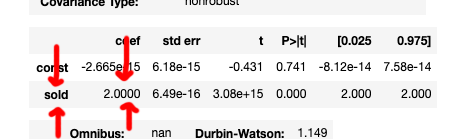

We can put this into words like:

* For every one more "sold" we have, we get two more "revenue"
* For every one point increase in sold, we'll have a two point increase in revenue

I know we weren't supposed to get technical, but just so you know: the `2.0000` is called the **coefficient**. The coefficient for `sold` is how much `revenue` will change if `sold` goes up by one.

**`sold` isn't our only only coefficient, though!** There's also the `const` one right above it, which is `-2.665e-15`.

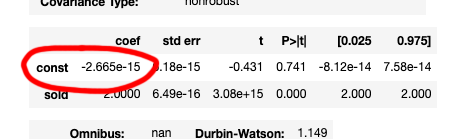

We'll talk more about `const` later (it's going to show up all the time), but it basically means "how much money we've made if we've sold zero coffees."

In this case, `const` is `-2.665e-15`. The `e-15` part means "move the decimal point 15 places to the left to see what the number really is." That means when we sell zero coffees, we make `-0.000000000000002665`. That's basically zero, right?

# Let's review

OK, so what did we just learn?

Sometimes we know how much coffee we sold and how much each coffee is, and we want to know how much money we made.

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × $2 per coffee`|We make ???|
|We sell four coffees|`4 × $2 per coffee`|We make ???|
|We sell sixteen coffees|`16 × $2 per coffee`|We make ???|

That is **not** regression. That is, I don't know, normal math?

Regression is when **we know how much money we made and how many coffees we sold, but not how much coffee is.** 

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × ??? per coffee`|We make \\$0|
|We sell four coffees|`4 × ??? per coffee`|We make \\$8|
|We sell sixteen coffees|`16 × ??? per coffee`|We make \\$32|

If we want to risk sounding technical, linear regression is a question of "how do the inputs affect the number that comes out at the end."

* How much does XXX affect YYY?
* How much does XXX affect YYY?
* How much does XXX affect YYY?

# Getting a little more complicated

The real world is rarely as simple and exact as our coffee example, though!

Let's say we're a bad driver. A _terrible_ driver.

* We drove 2,000 miles and got in 2 crashes.
* We drove another 50,000 miles, got in 48 crashes.
* We drove another 30,000 miles, got in 33 crashes.

**Linear regression is:** how is the number of miles we drive related to the number of crashes we're gotten in? If we look at the number, it isn't so hard: about every 1,000 miles we get in an accident.

It isn't exact, but **that's okay!**

Let's see how that looks with code.

In [111]:
# Our data
df = pd.DataFrame([
    { 'miles': 2000, 'crashes': 2 },
    { 'miles': 50000, 'crashes': 48 },
    { 'miles': 30000, 'crashes': 33 },
])
df

,miles,crashes
0,2000,2
1,50000,48
2,30000,33


In [112]:
# What effect does the number of miles driven have on the number of crashes?
model = smf.ols(formula='crashes ~ miles', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     94.98
Date:                Sat, 14 Sep 2019   Prob (F-statistic):             0.0651
Time:                        08:56:01   Log-Likelihood:                -6.2682
No. Observations:                   3   AIC:                             16.54
Df Residuals:                       1   BIC:                             14.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2110      3.345      0.362      0.779     -41.296      43.718
miles          0.0010   9.93e-05      9.746      0.065      -0.000       0.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.674
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.511
Skew:                           0.678   Prob(JB):                        0.774
Kurtosis:                       1.500   Cond. No.                     5.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our coefficient is `0.0010`, which means "for every one mile we drive, we get in roughly an additional 0.0010 crashes." That... doesn't make much sense, does it?

When we used our brains instead of math, we'd said "one crash for every **one thousand** miles." **We can actually put that calculation right into our regression formula!** The Python library [numpy](https://numpy.org/) is going to help us out with the division

In [113]:
import numpy as np

# What effect does the number of miles driven have on the number of crashes?
# Unfortunately we can't just do miles / 1000! it's np.divide or nothing.
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     94.98
Date:                Sat, 14 Sep 2019   Prob (F-statistic):             0.0651
Time:                        08:56:05   Log-Likelihood:                -6.2682
No. Observations:                   3   AIC:                             16.54
Df Residuals:                       1   BIC:                             14.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.2110      3.345      0.362      0.779     -41.296      43.718
np.divide(miles, 1000)     0.9679      0.099      9.746      0.065      -0.294       2.230
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.674
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.511
Skew:                           0.678   Prob(JB):                        0.774
Kurtosis:                       1.500   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

That's a little easier: **for every 1000 miles driven, we get in 0.9679 crashes.**

Instead of using `np.divide`, we could also change the data itself. Instead of looking at miles, we can make a new column where we've converted our miles into thousands of miles.

In [114]:
df['miles_1k'] = df.miles / 1000
df

,miles,crashes,miles_1k
0,2000,2,2.0
1,50000,48,50.0
2,30000,33,30.0


And then we can use thousands of miles instead of miles in our regression formula.

In [115]:
# What effect does the number of miles driven (in thousands) have on the number of crashes?
model = smf.ols(formula='crashes ~ miles_1k', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     94.98
Date:                Sat, 14 Sep 2019   Prob (F-statistic):             0.0651
Time:                        08:56:13   Log-Likelihood:                -6.2682
No. Observations:                   3   AIC:                             16.54
Df Residuals:                       1   BIC:                             14.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2110      3.345      0.362      0.779     -41.296      43.718
miles_1k       0.9679      0.099      9.746      0.065      -0.294       2.230
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.674
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.511
Skew:                           0.678   Prob(JB):                        0.774
Kurtosis:                       1.500   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# But this is all just an estimate!

Now imagine instead of a few data points, I had a lot of them. Instead of just _one_ person driving 2,000 miles, I have a _hundred_ people. Many of them got in around 2 crashes, but some had fewer and some had more. Then I have another hundred people who drove 50,000 miles, and some of them got into 50 crashes _exactly_, but again: some fewer, some more.

Linear regression is the idea that we can roughly figure out for every thousand miles, how often does someone get in a crash. It doesn't have to be exactly right, and **it _isn't_ going to be exactly right** - some people get in more crashes, some people get in fewer crashes - but it's a rough explanation of how miles driven relates to crashes, and that's all we're interested in.

Let's see how our regression from above looks after adding in a few more drivers.

In [116]:
df = pd.DataFrame([
    {'miles': 2000, 'crashes': 2},
    {'miles': 2000, 'crashes': 0},
    {'miles': 2000, 'crashes': 3},
    {'miles': 5000, 'crashes': 3},
    {'miles': 5000, 'crashes': 6},
    {'miles': 5000, 'crashes': 5}
])
df

,miles,crashes
0,2000,2
1,2000,0
2,2000,3
3,5000,3
4,5000,6
5,5000,5


It's a little more varied now - some people have gotten in 3 crashes after 2,000 miles, but one person didn't have any! And it's the same at 5,000 miles - some people haven't had many crashes, while others have had a lot.

What's the regression look like?

In [127]:
# What effect does the number of miles driven have on the number of crashes?
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.786
Date:                Sat, 14 Sep 2019   Prob (F-statistic):             0.0739
Time:                        11:42:15   Log-Likelihood:                -9.8391
No. Observations:                   6   AIC:                             23.68
Df Residuals:                       4   BIC:                             23.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3333      1.583     -0.211      0.844      -4.729       4.062
np.divide(miles, 1000)     1.0000      0.416      2.405      0.074      -0.154       2.154
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.708
Skew:                          -0.382   Prob(JB):                        0.702
Kurtosis:                       1.500   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for miles similar to the one before:

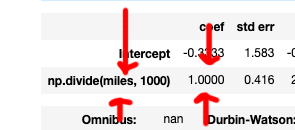

**For every one thousand miles these people drive, they get into about 1 crash.**

But if after 2,000 miles some people have zero crashes and some have a few... **how good of an estimate is our regression?** Luckily, it's not too hard to answer!

When you perform a regerssion, one of the pieces of information you get is called **r squared**. You can find it in the top right-hand corner of the result summary.

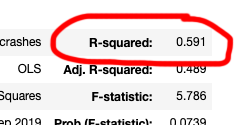

R squared is an explanation of how good your regression is.

* If our R squared was 1.0, 100% of the change in crashes can be explained by the number of miles
* If our R squared is 0.0, 0% of the change in crashes can be explained by the number of miles

In this case, our R squared is 0.591, which means the number of miles driven counts for about 60% of how many crashes someone gets into. The other 40% can be things like weather, luck, driving skill - other things we aren't measuring here, but which might factor in.

**Remember our coffee example?** Because no one tipped, the number of cups of coffee helped us **exactly** claculate how much revenue we made.

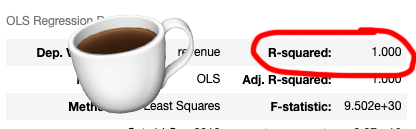

As a result, 100% of the revenue is explained by the number of coffees sold.

# But the graphs!

Whenever people talk about linear regression, they **love to draw graphs**. So let's do that with our miles driven.

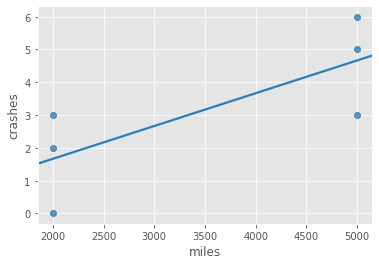

In [144]:
%matplotlib inline

import seaborn as sns

sns.regplot(x='miles', y='crashes', ci=None, data=df, color='#2c7fb8')

**Every single dot is one of our data points:** miles are along the bottom, and crashes are up and down. More to the right? More miles. Up higher? More crashes.

Let's annotate that.

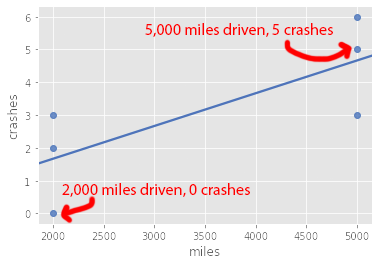

**The line is our regression.** It shows us the relationship between miles driven and how many crashes you can expect. We can pick any point on the x axis - the number of miles driven - and make a prediction for how many crashes someone will have after driving that much.

How many crashes do we predict for someone who has driven **4,000 miles?**

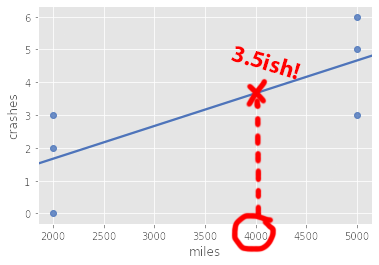

You of course can't _actually_ experience 3.5 crashes, but based on everyone's else's experience this 4,000 mile person will probably experience a number of crashes somewhere around there.

# Making predictions with code

Instead of drawing a line on a graph and roughly estimating the predicted crashes for 4,000 miles driven, let's get ap rediction using statsmodels. Let's do a few drivers, because why stop at one?

In [158]:
df = pd.DataFrame([
    { 'miles': 1000 },
    { 'miles': 4000 },
    { 'miles': 2500 },
    { 'miles': 7500 }
])
df

,miles
0,1000
1,4000
2,2500
3,7500


To make a prediction, we're going to use the `results` variable. All it takes is `.predict` and we're good to go!

In [161]:
df['predicted_crashes'] = results.predict(df)
df

,miles,predicted_crashes
0,1000,0.666667
1,4000,3.666667
2,2500,2.166667
3,7500,7.166667


We can plot all of our predictions, but they won't be very exciting! Since the prediction is the same as the regression line, they're all just going to sit right on top of that line.

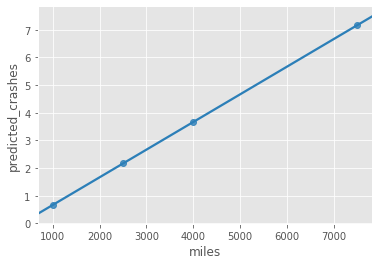

In [163]:
sns.regplot(x='miles', y='predicted_crashes', ci=None, data=df, color='#2c7fb8')

Real drivers will most likely have more or less crashes than what we're predicting, but hey: sometimes you just want to make an educated guess!